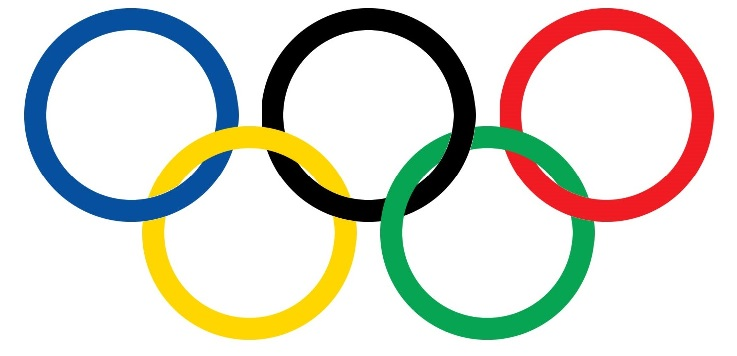

# Tokyo 2020 Olympics Data Analysis Project
Analysis of Tokyo 2020 Olympics data from kaggle.com

In [ ]:
# Steps to download zip from kaggle and unzip
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo
!unzip 2021-olympics-in-tokyo.zip

  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 22.7MB/s]
Archive:  2021-olympics-in-tokyo.zip
  inflating: Athletes.xlsx           
  inflating: Coaches.xlsx            
  inflating: EntriesGender.xlsx      
  inflating: Medals.xlsx             
  inflating: Teams.xlsx              


In [6]:
# install pyspark
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 65.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=e043ec29118e31a0c595f93fee62af2bcd5a7cbd0b2db528484755eec014558c
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [7]:
# import pyspark
import pyspark
# get access to spark
spark = pyspark.sql.SparkSession(pyspark.SparkContext())
spark

In [4]:
# Convert Excel files to csvs
import pandas as pd

def excel_to_csv(name):
  pd.read_excel(name + '.xlsx').to_csv(name + '.csv', sep=',', index=False)

excel_to_csv('Athletes')
excel_to_csv('Coaches')
excel_to_csv('EntriesGender')
excel_to_csv('Medals')
excel_to_csv('Teams')

In [5]:
# Read in Pandas dataframes
athletes = pd.read_csv('Athletes.csv')
coaches = pd.read_csv('Coaches.csv')
entries_gender = pd.read_csv('EntriesGender.csv')
medals = pd.read_csv('Medals.csv')
teams = pd.read_csv('Teams.csv')

In [8]:
# Show head of medals
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [9]:
medals.isnull()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False
89,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False


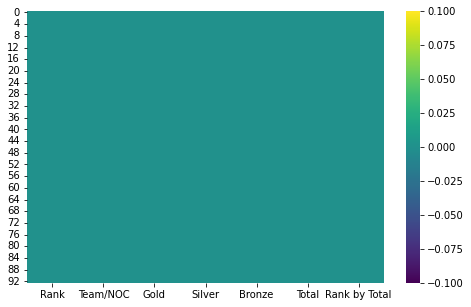

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#check for any missing data
plt.figure(figsize=(8,5))
sns.heatmap(medals.isnull(),cmap='viridis')

In [14]:
# sort medals by total
medals.sort_values('Rank by Total', inplace=True)
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5


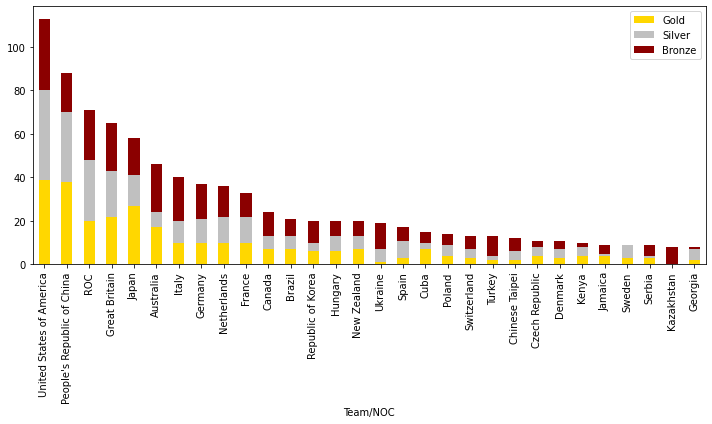

In [15]:
# make stacked bar chart of medals won by the top 30 countries showing Gold, Silver and Bronze
medals.iloc[:30].plot(kind='bar', x='Team/NOC',y=['Gold','Silver','Bronze'], stacked=True, color=['gold', 'silver', 'darkred'],figsize=(10,6))
plt.tight_layout()

In [16]:
#show head of coaches data
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [17]:
spark.read.csv('Coaches.csv', header=True, inferSchema=True).createOrReplaceTempView('coaches')
spark.sql('select * from coaches').show(10)

+--------------------+--------------------+-----------------+--------+
|                Name|                 NOC|       Discipline|   Event|
+--------------------+--------------------+-----------------+--------+
|     ABDELMAGID Wael|               Egypt|         Football|    null|
|           ABE Junya|               Japan|       Volleyball|    null|
|       ABE Katsuhiko|               Japan|       Basketball|    null|
|        ADAMA Cherif|       Côte d'Ivoire|         Football|    null|
|          AGEBA Yuya|               Japan|       Volleyball|    null|
|AIKMAN Siegfried ...|               Japan|           Hockey|     Men|
|       AL SAADI Kais|             Germany|           Hockey|     Men|
|       ALAMEDA Lonni|              Canada|Baseball/Softball|Softball|
|     ALEKNO Vladimir|Islamic Republic ...|       Volleyball|     Men|
|     ALEKSEEV Alexey|                 ROC|         Handball|   Women|
+--------------------+--------------------+-----------------+--------+
only s

In [18]:
pd_coaches_query = spark.sql('select NOC, count(NOC) as count from Coaches group by NOC').toPandas()
pd_coaches_query.head(10)

,NOC,count
0,Côte d'Ivoire,5
1,Islamic Republic of Iran,2
2,Sweden,3
3,Republic of Korea,7
4,Fiji,2
5,Turkey,1
6,Germany,9
7,Cambodia,1
8,France,10
9,Greece,6


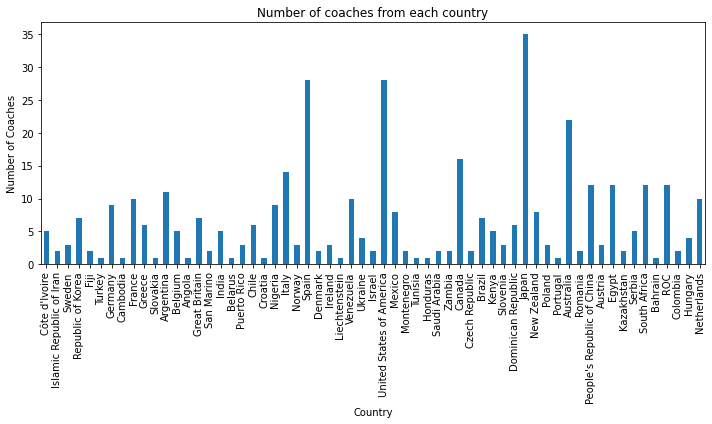

In [20]:
# Simple bar chart of coaches from each country
pd_coaches_query.plot(kind='bar',x='NOC', y='count', title='Number of coaches from each country',figsize=(10,6),legend=False)
plt.xlabel('Country')
plt.ylabel('Number of Coaches')
plt.tight_layout()

In [21]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [22]:
# Add athletes to pyspark sql
spark.read.csv('Athletes.csv', header=True, inferSchema=True).createOrReplaceTempView('Athletes')
spark.sql('select * from Athletes').show(10)

+-----------------+--------------------+-------------------+
|             Name|                 NOC|         Discipline|
+-----------------+--------------------+-------------------+
|  AALERUD Katrine|              Norway|       Cycling Road|
|      ABAD Nestor|               Spain|Artistic Gymnastics|
|ABAGNALE Giovanni|               Italy|             Rowing|
|   ABALDE Alberto|               Spain|         Basketball|
|    ABALDE Tamara|               Spain|         Basketball|
|        ABALO Luc|              France|           Handball|
|     ABAROA Cesar|               Chile|             Rowing|
|    ABASS Abobakr|               Sudan|           Swimming|
| ABBASALI Hamideh|Islamic Republic ...|             Karate|
|    ABBASOV Islam|          Azerbaijan|          Wrestling|
+-----------------+--------------------+-------------------+
only showing top 10 rows



In [23]:
# Get count of each unique combination of NOC and Discipline
pd_athletes_query = spark.sql('''select first(NOC) as NOC, first(Discipline) as Discipline, 
                                 count(*) Count from athletes group by NOC, Discipline order 
                                 by NOC, Discipline''').toPandas()
pd_athletes_query.head(10)

,NOC,Discipline,Count
0,Afghanistan,Athletics,2
1,Afghanistan,Shooting,1
2,Afghanistan,Swimming,1
3,Afghanistan,Taekwondo,1
4,Albania,Artistic Gymnastics,1
5,Albania,Athletics,1
6,Albania,Judo,1
7,Albania,Shooting,1
8,Albania,Swimming,2
9,Albania,Weightlifting,2


In [25]:
# Show number of athletes in each discipline
athletes['Discipline'].value_counts().head(10)

Athletics       2068
Swimming         743
Football         567
Rowing           496
Hockey           406
Judo             373
Handball         343
Shooting         342
Sailing          336
Rugby Sevens     283
Name: Discipline, dtype: int64

In [26]:
# Only keep rows with discipline in top 4
pd_athletes_query = pd_athletes_query.loc[pd_athletes_query['Discipline'].isin(['Athletics', 'Swimming', 'Football','Rowing'])]
pd_athletes_query.head(5)

,NOC,Discipline,Count
0,Afghanistan,Athletics,2
2,Afghanistan,Swimming,1
5,Albania,Athletics,1
8,Albania,Swimming,2
10,Algeria,Athletics,8


In [27]:
disc = pd_athletes_query.groupby(['NOC','Discipline'])['Count'].sum().unstack().fillna(0)
disc

Discipline,Athletics,Football,Rowing,Swimming
NOC,,,,
Afghanistan,2.0,0.0,0.0,1.0
Albania,1.0,0.0,0.0,2.0
Algeria,8.0,0.0,2.0,2.0
American Samoa,1.0,0.0,0.0,1.0
Andorra,1.0,0.0,0.0,0.0
...,...,...,...,...
"Virgin Islands, British",2.0,0.0,0.0,1.0
"Virgin Islands, US",1.0,0.0,0.0,2.0
Yemen,1.0,0.0,0.0,1.0


<Figure size 432x288 with 0 Axes>

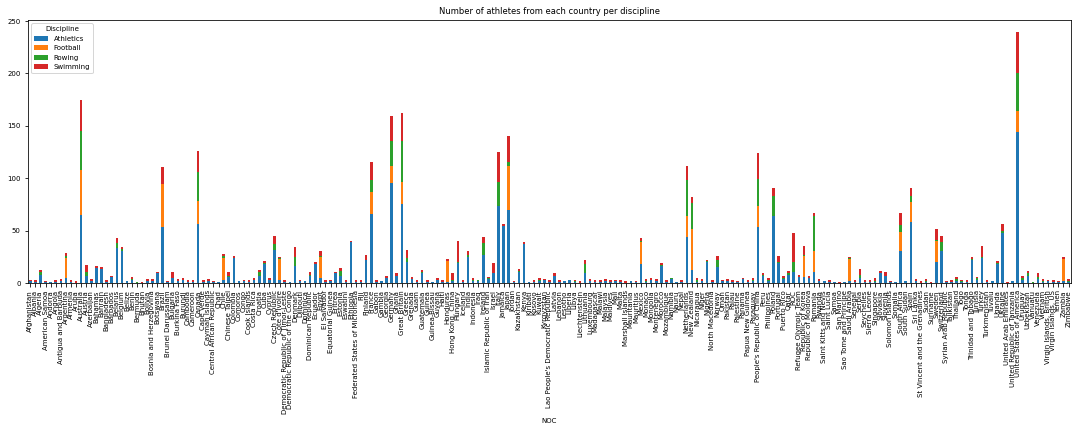

In [28]:
# Bar chart of number of athletes split by discipline
plt.figure()
plt.rcParams.update({'font.size': 7})
disc.plot(kind='bar', stacked=True,title='Number of athletes from each country per discipline',figsize=(15,6))
plt.tight_layout()

In [29]:
# Show head of entries_gender
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


<Figure size 432x288 with 0 Axes>

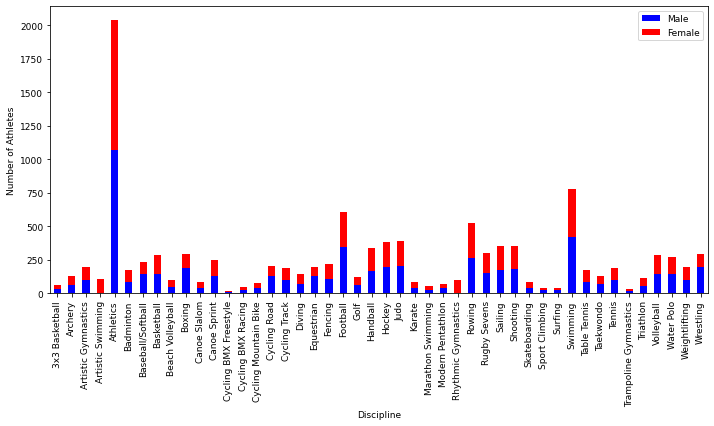

In [31]:
plt.figure()
plt.rcParams.update({'font.size': 9})
entries_gender.plot(kind='bar', x='Discipline',y=['Male','Female'], stacked=True, color=['Blue','Red'],figsize=(10,6))
plt.ylabel('Number of Athletes')
plt.tight_layout()